In [2]:
# The sequential model allows us to specify a neural network, precisely, 
# sequential: from input to output, passing through a series of neural 
# layers, one after the other
from keras.models import Sequential
# Conv2D stands for "2D Convolution," and it is a fundamental operation 
# in convolutional neural networks(CNNs) used primarily for image processing 
# and computer vision tasks. The Conv2D function is a building block of these 
# networks and is responsible for applying filters to input data, such as images, 
# to extract meaningful features.
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout,BatchNormalization

In [3]:
classifier = Sequential()

In [4]:
# Convolution
classifier.add(Conv2D(32, 5, 5, input_shape = (256, 256, 3), activation = 'relu'))

In [6]:
# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [7]:
# Adding a second convolutional layer
classifier.add(Conv2D(64, 5, 5, activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [8]:
# Flattening
classifier.add(Flatten()) # flatten layer-> flatten ther matrix from 2d to 1d, ex. [[1,2],[3,4]] to [1,2,3,4]

In [9]:
# Full connection
classifier.add(Dense(128, activation = 'relu')) #hidden layer

classifier.add(Dense(1, activation = 'sigmoid')) # output layer

In [10]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 51, 51, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                        

In [11]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_datagen

In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('dataset1/train',
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

Found 209 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('dataset1/test',
                                            target_size = (256, 256),
                                            batch_size = 16,
                                            class_mode = 'binary')


Found 72 images belonging to 2 classes.


In [16]:
from livelossplot import PlotLossesKerasTF

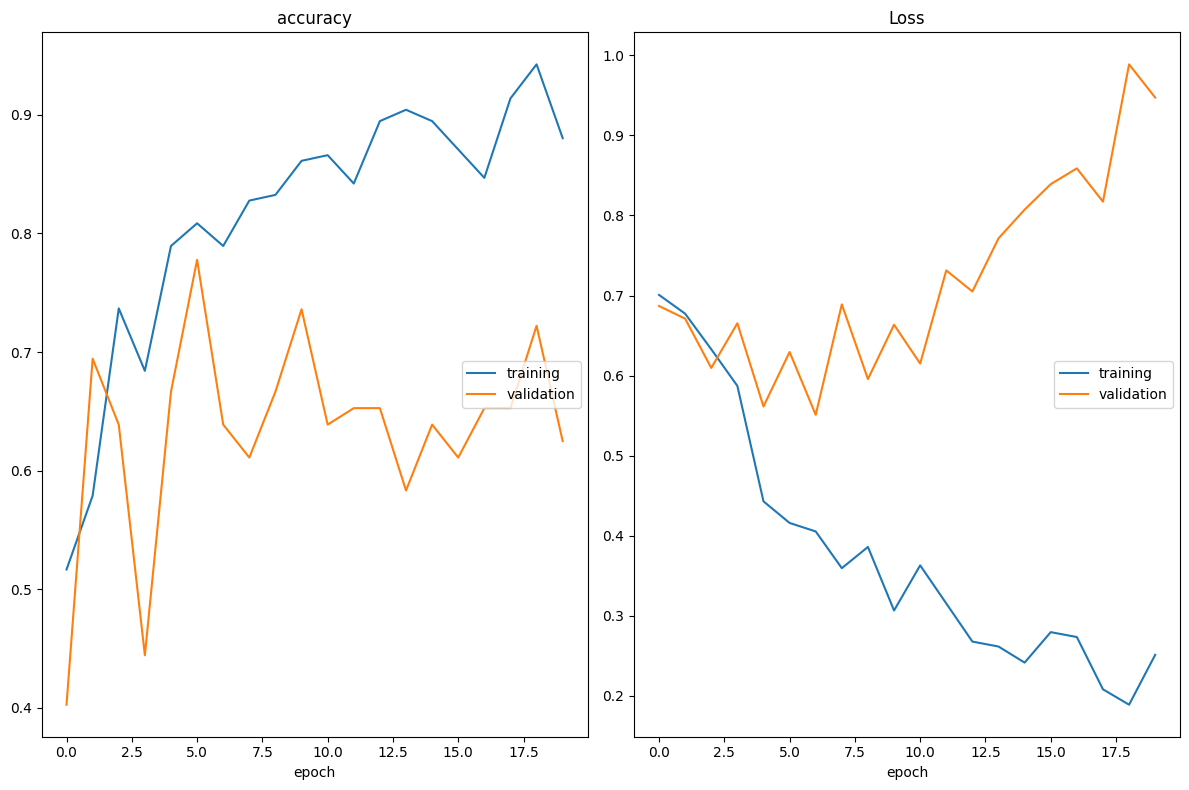

accuracy
	training         	 (min:    0.517, max:    0.943, cur:    0.880)
	validation       	 (min:    0.403, max:    0.778, cur:    0.625)
Loss
	training         	 (min:    0.189, max:    0.701, cur:    0.251)
	validation       	 (min:    0.551, max:    0.989, cur:    0.947)
14/14 [==============================] - 4s 268ms/step - loss: 0.2513 - accuracy: 0.8804 - val_loss: 0.9472 - val_accuracy: 0.6250


In [17]:
classifier.fit(training_set,epochs=20,validation_data = test_set,callbacks=[PlotLossesKerasTF()])


In [22]:
import numpy as np
# from keras.preprocessing import image
import keras.utils as image
test_image = image.load_img('dataset1/test/kohli/kohli_0_24.jpeg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0]>=0.5:
    prediction= 'kohli'
    print('Result is',result[0][0])
else:
    prediction = 'dhoni'
    print('Result is',result[0][0])
print(prediction)

1/1 [==============================] - 0s 29ms/step
Result is 1.0
kohli


In [33]:
import numpy as np
# from keras.preprocessing import image
import keras.utils as image
# test_image = image.load_img('C:/Users/nisar/Desktop/udemy/ineuron/testing/t2.jpg',target_size=(256,256))
test_image = image.load_img('dataset1/test/dhoni/d15.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0]>=0.5:
    prediction= 'kohli'
    print('Result is',result[0][0])
else:
    prediction = 'dhoni'
    print('Result is',result[0][0])
print(prediction)

1/1 [==============================] - 0s 39ms/step
Result is 0.0
dhoni
